{1: 0.2198216628231329, 2: 0.13267879776999614, 3: 0.10225850410426901, 4: 0.1738367286716134, 5: 0.1738367286716134, 6: 0.10225850410426901, 7: 0.09530907385510634}
{1: 0.15677487446407373, 2: 0.11222854074269538, 3: 0.046352025844859784, 4: 0.2013579414399821, 5: 0.2013579414399821, 6: 0.046352025844859784, 7: 0.23557665022354712}


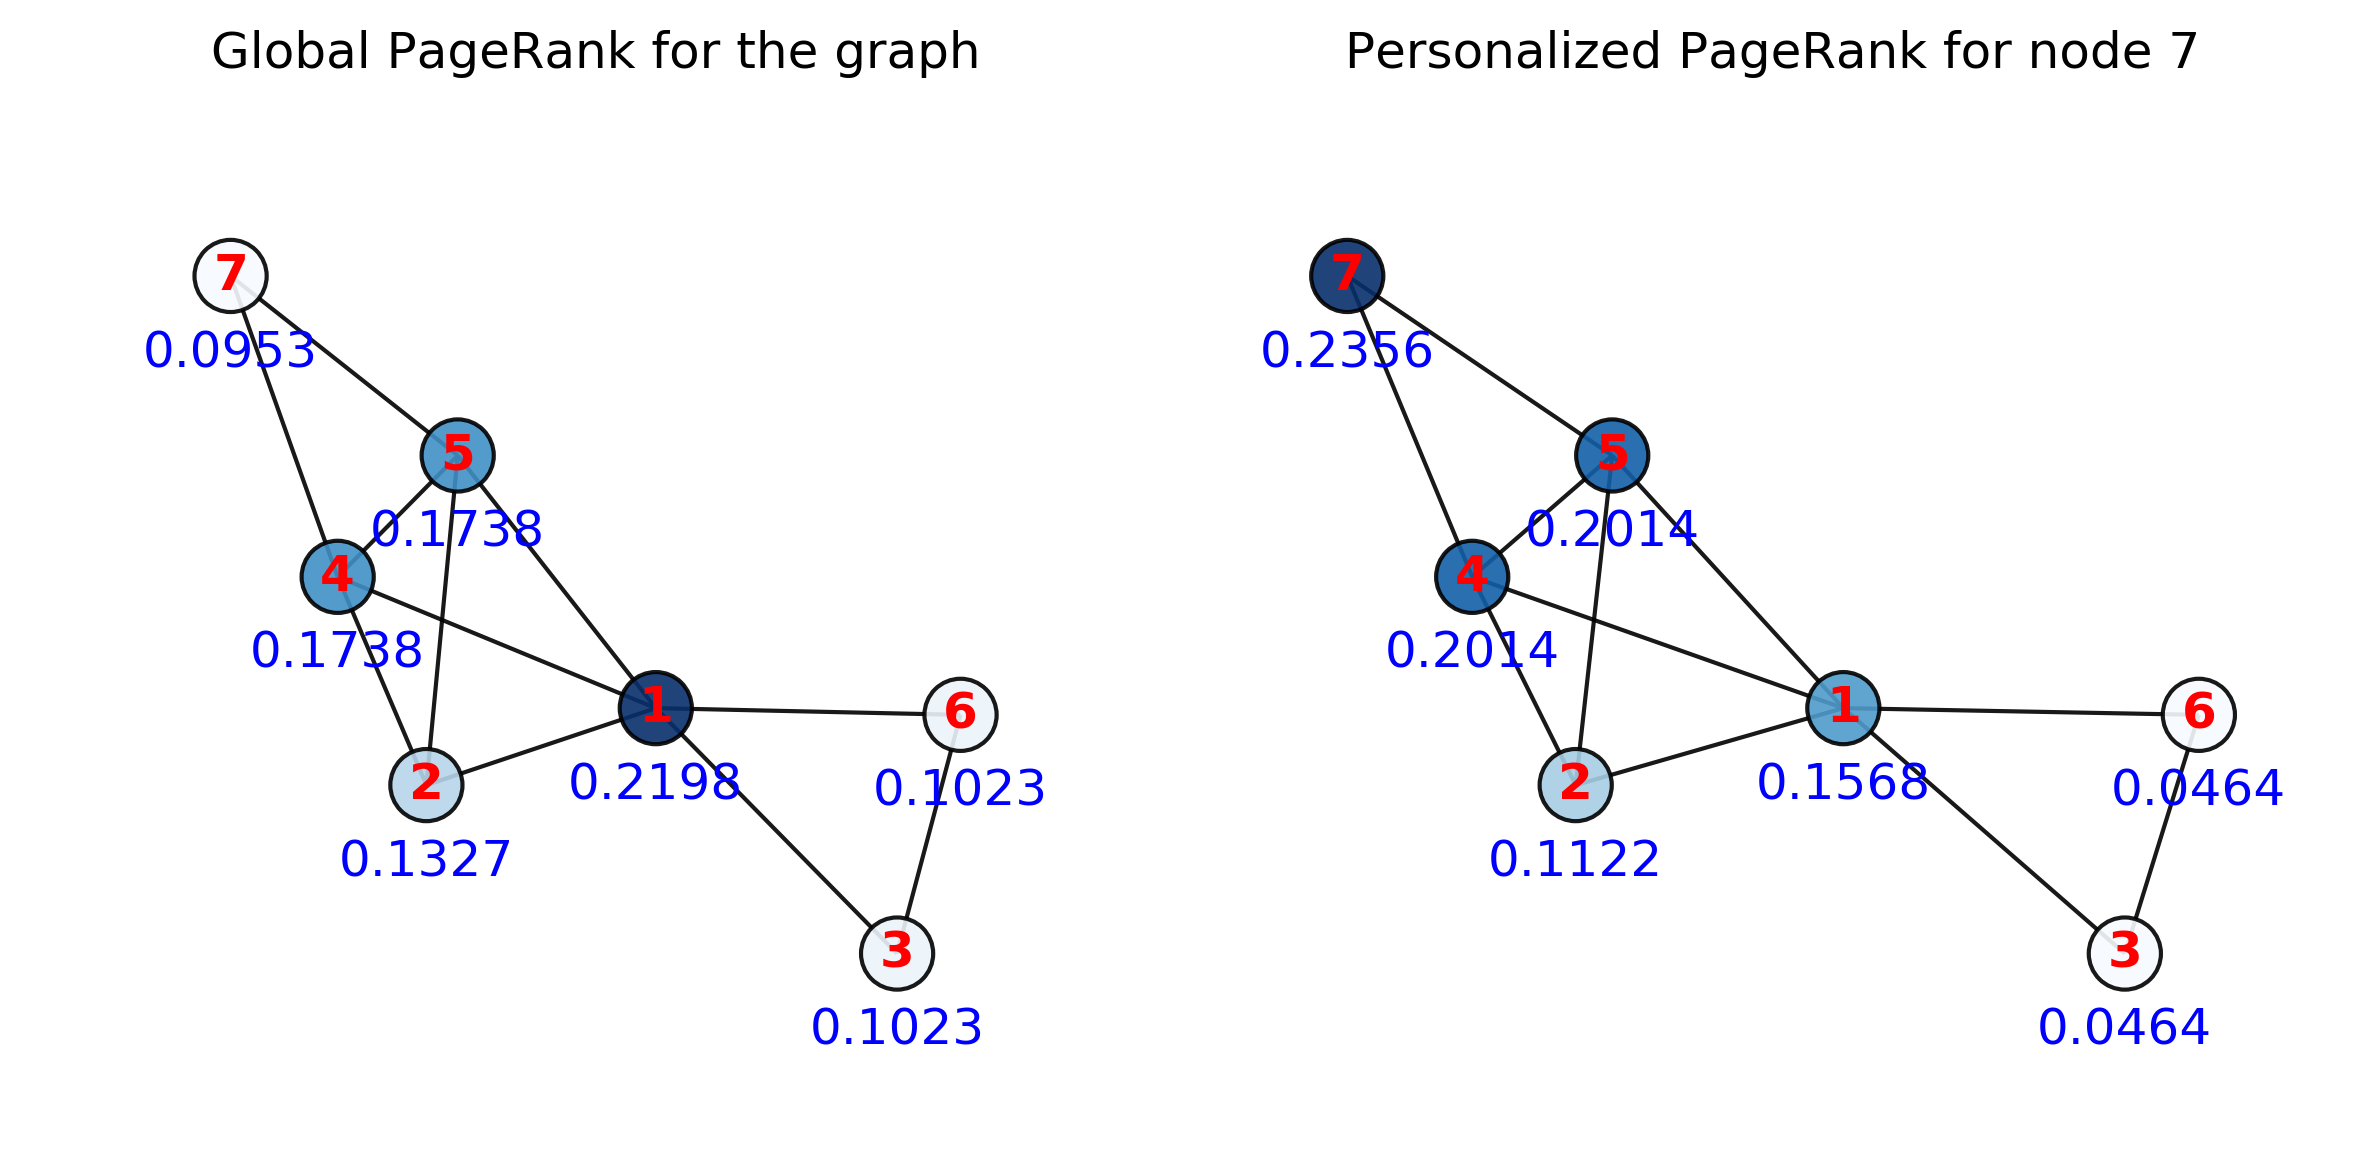

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np 


fig, axs = plt.subplots(1,2, figsize=(8,4), dpi=300)
axs = np.array([axs]).flatten()
# Create a simple undirected graph with 6 nodes
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7])
G.add_edges_from([(1,2),(1,3),(2,4),(2,5),(3,6), (1,6),(4,5),(1,4),(5,7),(4,7),(1,5)])


ax = axs[0]
# Calculate the pagerank values for each node
pr = nx.pagerank(G)
nx.set_node_attributes(G, pr, "pagerank")
# Plot the graph with nodes colored by their pagerank value
pos = nx.spring_layout(G, seed = 1)
node_color = list(pr.values())
labels = nx.get_node_attributes(G, "pagerank")
new_lbs = {}
for key, val in labels.items():
    new_lbs[key] = np.round(labels[key],4)
nx.draw(G, pos, node_color=node_color , edgecolors = 'black',cmap=plt.cm.Blues, ax = ax, alpha= 0.9)
pos_lbs = {}
for key, val in pos.items():
    new_lab = np.copy(val)
    new_lab[1]-=0.15
    pos_lbs[key] = new_lab
nx.draw_networkx_labels(G, pos_lbs, new_lbs, font_color='blue', font_size=12, ax = ax)
print(labels)
for node in G.nodes:
    nx.draw_networkx_labels(G, pos, {node: f"{node}"}, font_size=12, font_color="red", font_weight="bold", verticalalignment="center", horizontalalignment="center", alpha=1,ax =ax)
ax.margins(x=0.2, y =0.2)
ax.set_title(f'Global PageRank for the graph')




ax = axs[1]
# Calculate the pagerank values for each node
damping = 0.85
personalization = {7: 1.0,}

# Calculate the personalized pagerank values for each node
pr = nx.pagerank(G, alpha=damping, personalization=personalization)
nx.set_node_attributes(G, pr, "pagerank")
# Plot the graph with nodes colored by their pagerank value
pos = nx.spring_layout(G, seed = 1)
node_color = list(pr.values())
labels = nx.get_node_attributes(G, "pagerank")
new_lbs = {}
for key, val in labels.items():
    new_lbs[key] = np.round(labels[key],4)
nx.draw(G, pos, node_color=node_color , edgecolors = 'black',cmap=plt.cm.Blues, ax = ax, alpha= 0.9)
pos_lbs = {}
for key, val in pos.items():
    new_lab = np.copy(val)
    new_lab[1]-=0.15
    pos_lbs[key] = new_lab
nx.draw_networkx_labels(G, pos_lbs, new_lbs, font_color='blue', font_size=12, ax = ax)
print(labels)
for node in G.nodes:
    nx.draw_networkx_labels(G, pos, {node: f"{node}"}, font_size=12, font_color="red", font_weight="bold", verticalalignment="center", horizontalalignment="center", alpha=1,ax =ax)
ax.margins(x=0.1, y =0.2)
ax.set_title(f'Personalized PageRank for node 7')

fig.tight_layout()


fig.savefig('/Users/xingzhiguo/Library/CloudStorage/Dropbox/Apps/Overleaf/thesis-xingzhi-2022/plot-pythoin/fig-ppr-intro.pdf', format='pdf', bbox_inches = 'tight', dpi=300)


{1: array([ 0.22654907, -0.13529226]),
 2: array([-0.35570084, -0.28491612]),
 3: array([ 0.83896384, -0.61244197]),
 4: array([-0.58087518,  0.11998245]),
 5: array([-0.2762574 ,  0.35597209]),
 6: array([ 1.        , -0.14830835]),
 7: array([-0.85267949,  0.70500417])}

In [6]:
    
import matplotlib

matplotlib.rcParams['font.family'] = "serif"
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('lines', markersize=2)

import os

import pandas as pd

from dateutil import parser
import json
from tqdm import tqdm as tqdm
import numpy as np


data_path = "/Users/xingzhiguo/Downloads"
pd_feature = pd.read_pickle(os.path.join(data_path ,"cache/pd_d1_2_3_4_5_6_7_8_9_10_11_12_13_14_15_16_17_18_19_20_21_22_23_24_25_26_27_28_29_raw_feature_description_v3.pkl"))



def draw_edit_time_by_agency(pd_raw_feature_description, agency, ax):
    np_parased_tweet_publish_timestamp= pd_raw_feature_description["PreVisitTime"].map(lambda x: parser.parse(str(x)).timestamp()).to_numpy()
    np_parased_tweet_crawl_timestamp = pd_raw_feature_description["CrtVisitTime"].map(lambda x: parser.parse(str(x)).timestamp()).to_numpy()
    print (np_parased_tweet_crawl_timestamp.shape)
    print (np_parased_tweet_publish_timestamp.shape)
    delta_time_hour = (np_parased_tweet_crawl_timestamp - np_parased_tweet_publish_timestamp)/(3600)
    ax.hist(delta_time_hour, bins = 100, density = True)
    ax.set_title(f'{agency}' ,fontsize=MEDIUM_SIZE, y = 0.8, loc = "center")

    #ax.set_xlabel("Edit time (hour)")
    #ax.set_yticklabels(ax.get_yticks(), rotation = 45)
    #ax.set_ylabel("Frequency Density")
    ax.set_xlim([0, 40])
    #labels = [item.get_text() for item in ax.get_yticklabels()]
    # Beat them into submission and set them back again
    #ax.set_yticklabels([str(round(float(label), 2)) for label in la
    
fig, axs = plt.subplots(3,7, figsize = (1.7*7, 1.3*3), sharex = True, sharey = True)
axs_f = axs.flatten()
print (pd_feature["Domain"].unique().shape)

for i, agency in enumerate(pd_feature["Domain"].unique().tolist()):
    pd_raw_feature_description = pd_feature[pd_feature["Domain"] == agency]
    
    (pd_raw_feature_description, agency, axs_f[i])
    if i>=14:
        axs_f[i].set_xlabel("Edit time (hour)")
    if i%7==0:
        axs_f[i].set_ylabel("Frequency Density")

for j in range (i+1, 21):
    axs_f[j].set_xlabel("Edit time (hour)")
    axs_f[j].set_title('VOID' ,fontsize=MEDIUM_SIZE, y = 0.8, loc = "center")    
print("Done")
# fig.tight_layout(pad=0.01, h_pad = 0.05)
# fig.savefig(os.path.join(data_path, "results",f'fig_time_hist_all_agency.pdf'), bbox_inches = "tight", format = 'pdf', dpi=200)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/xingzhiguo/Downloads/cache/pd_d1_2_3_4_5_6_7_8_9_10_11_12_13_14_15_16_17_18_19_20_21_22_23_24_25_26_27_28_29_raw_feature_description_v3.pkl'